Analyze of systemic variables and interactions with other variables.


Copyright: G. J.-P. C. Becq, Gipsa-lab, UMR 5216, CNRS  
Date: 2019-05-07

This software is governed by the CeCILL-B license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL-B 
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL-B license and that you accept its terms.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools
import importlib as imp

In [3]:
imp.reload(tools)

<module 'tools' from '/Volumes/HD1/Users/becqg/Documents/project/Cerebrostat/git/article_rat/tools.py'>

In [4]:
df_db = pd.read_csv('../data/trial.csv')
df_cbf = pd.read_csv('../data/cbf.csv')
M = zeros((df_db.shape[0], 3))
for i in df_db.index: 
    name = df_db.loc[i, 'NAME']
    this_group = df_db.loc[i, 'GROUP']
    cond_cbf = (df_cbf['NAME'] == name)
    # CBF
    this_cbf = df_cbf[cond_cbf]
    mean_cbf = np.mean(this_cbf[tools.L_AREA].values)
    df_db.loc[i, 'CBF'] = around(mean_cbf, 2)
    # CD4
    fn = '../data/{1}/{0}_{1}.csv'.format(name, 'cD4')
    res = tools.get_C_no_mvt(df_db, name, fn, 4)
    mean_std = np.mean(res[1])
    mean_fcs = np.mean(res[2])
    df_db.loc[i, 'CD4'] = around(mean_std, 2)
    df_db.loc[i, '<C>'] = around(mean_fcs, 2)
    # RAW
    fn = '../data/{1}/{0}_{1}.csv'.format(name, 'raw')
    res = tools.get_C_no_mvt(df_db, name, fn, 0)
    mean_x = np.mean(res[0])
    mean_fcs = np.mean(res[2])
    df_db.loc[i, 'RAW'] = around(mean_x, 2)
    df_db.loc[i, '<C> RAW'] = around(mean_fcs, 2)
    # PHYSIO 
    res = tools.get_value_physio(name, this_group)
    (rr, hr, temp, spo2, err_rate) = res
    df_db.loc[i, 'RR'] = around(rr, 2)
    df_db.loc[i, 'HR'] = around(hr, 2)
    df_db.loc[i, 'TEMP'] = around(temp, 2)
    df_db.loc[i, 'SPO2'] = around(spo2, 2)
    df_db.loc[i, 'ERR_RATE'] = around(err_rate, 2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [5]:
for group in tools.L_GROUP: 
    tools.stat_one_group(df_db, group)

ETO_L
           WEIGHT       TEMP          HR         RR       SPO2        CBF
count    7.000000   7.000000    7.000000   7.000000   7.000000   7.000000
mean   190.857143  36.085714  343.370000  67.234286  98.902857  25.130000
std      6.517376   2.438380   51.143266  10.775330   0.594130   5.590233
min    178.000000  31.190000  283.080000  54.040000  98.160000  16.090000
25%    189.000000  35.435000  301.230000  60.235000  98.390000  22.385000
50%    192.000000  36.920000  347.690000  66.910000  99.060000  24.390000
75%    196.000000  37.680000  381.095000  72.180000  99.340000  29.175000
max    196.000000  38.260000  408.170000  84.860000  99.640000  32.310000
ISO_L
           WEIGHT       TEMP          HR        RR       SPO2        CBF
count    6.000000   5.000000    5.000000   5.00000   5.000000   6.000000
mean   254.333333  38.232000  443.792000  66.61000  96.188000  67.418333
std     54.763735   0.452184   26.259136  11.39596   4.778658   9.990534
min    182.000000  37.680000  

In [6]:
df_db.to_csv('../data/trial_with_mean_values.csv')

AxesSubplot(0.125,0.125;0.775x0.755)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


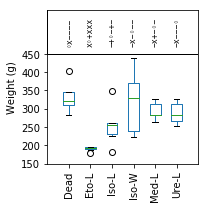

In [9]:
imp.reload(tools)
l_col = ['CBF', 
         'RAW', '<C> RAW', 
         'CD4', '<C>', 
         'HR', 'RR', 'SPO2', 'TEMP', 'ERR_RATE', 'WEIGHT']
l_fn_suff = ['CBF', 
         'RAW', 'CRAW', 
         'CD4', 'C', 
         'HR', 'RR', 'SPO2', 'TEMP', 'ERR_RATE', 'WEIGHT']
l_label = ['Baseline CBF (ml / 100 g / min)', 
           'Raw BOLD amplitude', '<C> Raw', 
           'BOLD variation', '<C> BOLD-BOLD', 
           'Heart Rate (bpm)', 'Resp. Rate (cpm)', 
            'SpO2 (%)', 'Temp. (°C)', 'Error rate (%)', 'Weight (g)']
l_lim = [[0, 120], 
         [20, 60], [0, 1], 
         [0, 0.3], [0, 1], 
         [150, 500], [20, 130], [85, 100], [35, 39], [0, 100], [150, 450]]
l_tick = [20,
          10, 0.25, 
          0.1, 0.25, 
          50, 20, 5, 1, 25, 50]
(fig, ax)=subplots(1)
fig.set_figheight(3)
fig.set_figwidth(3)
print(ax)
for i in range(len(l_col)): 
    ax.cla()
    #(k, l) = divmod(i, 3)
    des, l_val = tools.boxplot_per_group(df_db, l_col[i], l_label[i], ax=ax, y_lim=l_lim[i], y_tick=l_tick[i])
    fig.tight_layout()
    fig.savefig('../fig/no_mvt_boxplot_' + l_fn_suff[i] + '.png')
    fig.savefig('../fig/no_mvt_boxplot_' + l_fn_suff[i] + '.pdf') 

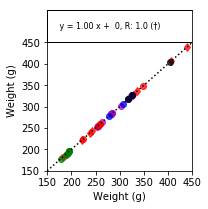

In [10]:
(fig, ax) = subplots(1)
fig.set_figwidth(3)
fig.set_figheight(3)
for i in range(len(l_col)): 
    for j in range(len(l_col)): 
        ax.cla()
        tools.scatter_xy(df_db, l_col[i], l_col[j], x_lim=l_lim[i], y_lim=l_lim[j], 
                   x_label=l_label[i], y_label=l_label[j], ax=ax, 
                   x_tick=l_tick[i], y_tick=l_tick[j], mod=2)
        fig.tight_layout()
        fig.savefig('../fig/no_mvt_scatter_' + l_fn_suff[i] + '_' + l_fn_suff[j] + '.pdf')

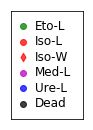

In [26]:
fig, ax = subplots(1)
fig.set_figwidth(1.3)
fig.set_figheight(2)
for i in range(6): 
    ax.scatter(0, 2 - i/2, color=tools.L_GROUP_COLOR[i], label=tools.L_GROUP_NAME[i], 
               marker=tools.L_GROUP_MARKER[i], alpha=0.75)
    ax.text(0.02, 2 - i/2, tools.L_GROUP_NAME[i], verticalalignment='center', fontsize=12)
#legend(fontsize=12)
ax.axis([-0.02, 0.1, -1, 2.5])
ax.set_xticks([])
ax.set_yticks([])
savefig('../fig/legend_2.pdf')
savefig('../fig/legend_2.png', dpi=300)

In [29]:
df_db[['GROUP', 'ERR_RATE']]

GROUP  ERR_RATE
0   ISO_W      0.00
1   ISO_W      0.00
2   URE_L    100.00
3   URE_L     65.17
4   ISO_W      1.06
5   URE_L     71.78
6   MED_L      0.00
7   MED_L     37.83
8    DEAD       NaN
9   MED_L     37.44
10  MED_L      2.89
11  MED_L     49.44
12  MED_L      2.50
13  MED_L      1.39
14  URE_L     99.00
15   DEAD       NaN
16  URE_L     63.11
17   DEAD       NaN
18  URE_L     99.56
19  URE_L    100.00
20  ISO_L    100.00
21  ISO_L     48.50
22  ISO_W      0.00
23  ISO_W      0.56
24  ISO_W      0.00
25  ISO_W      0.17
26  ISO_L     97.89
27  ETO_L     78.00
28  ETO_L      1.83
29  ETO_L      0.00
30  ETO_L     21.61
31  ETO_L      0.67
32  ETO_L      7.94
33  ETO_L     14.89
34   DEAD       NaN
35  ISO_L     27.83
36  ISO_L     48.89
37  ISO_L     83.67